In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

## Load data

In [3]:
data = pd.read_csv('sample.csv')

In [4]:
data_train = pd.read_csv('train.csv')

In [16]:
data_test = pd.read_csv('test.csv')

## Data detalization

In [17]:
data.head()

,id,radius
0,4365,0.14
1,1129,0.91
2,2602,0.79
3,1747,0.93
4,3286,0.76


In [18]:
data_train.head()

,amd,intel,radius
0,259,284,0.25
1,205,169,0.26
2,208,430,0.10
3,195,504,0.16
4,99,417,0.17


In [19]:
data_train.columns

Index(['amd', 'intel', 'radius'], dtype='object')

In [20]:
data_train.amd.describe()

count    5422.000000
mean      154.537993
std        69.836996
min        18.000000
25%        96.000000
50%       152.000000
75%       214.000000
max       288.000000
Name: amd, dtype: float64

In [21]:
data_train.drop('id', axis = 1, inplace = True)

ValueError: labels ['id'] not contained in axis

In [ ]:
data_train.intel.describe()

In [ ]:
data_train.radius.describe()

In [22]:
data_test.head()

,id,amd,intel
0,4365,206,405
1,1129,80,320
2,2602,136,228
3,1747,105,531
4,3286,161,475


In [23]:
# data_test.drop('id', axis = 1, inplace = True)

In [24]:
data_test.amd.describe()

count    603.000000
mean     147.895522
std       70.007575
min       23.000000
25%       90.000000
50%      142.000000
75%      206.500000
max      285.000000
Name: amd, dtype: float64

In [25]:
data_test.intel.describe()

count    603.000000
mean     315.950249
std      168.007725
min       16.000000
25%      164.000000
50%      326.000000
75%      467.500000
max      591.000000
Name: intel, dtype: float64

In [26]:
ProfileReport(data_train)

Number of variables,3
Number of observations,5422
Total Missing (%),0.0%
Total size in memory,127.2 KiB
Average record size in memory,24.0 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


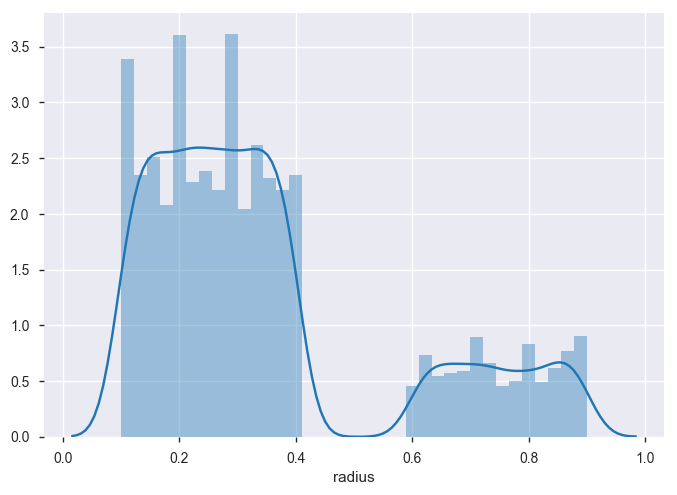

In [27]:
sns.distplot(data_train['radius'])

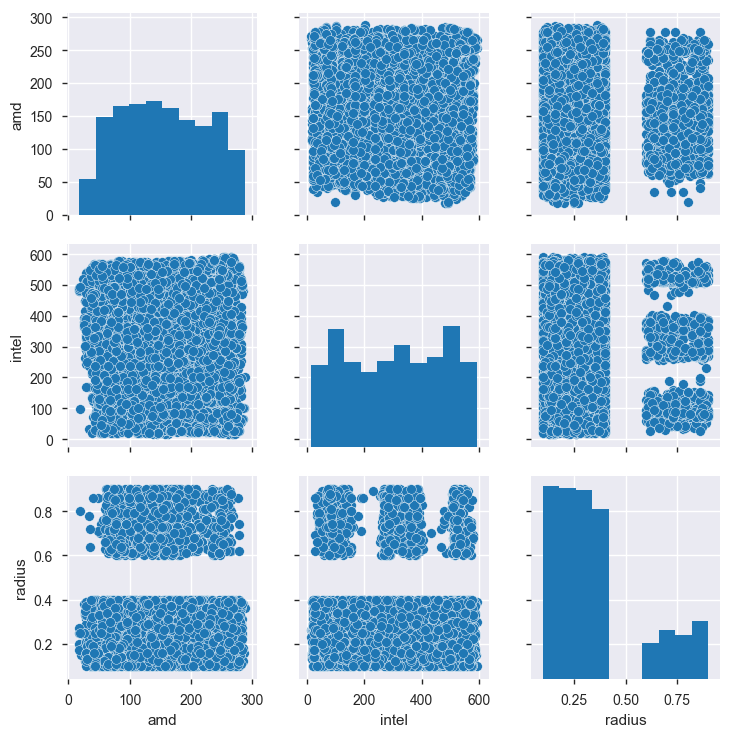

In [28]:
sns.pairplot(data_train)

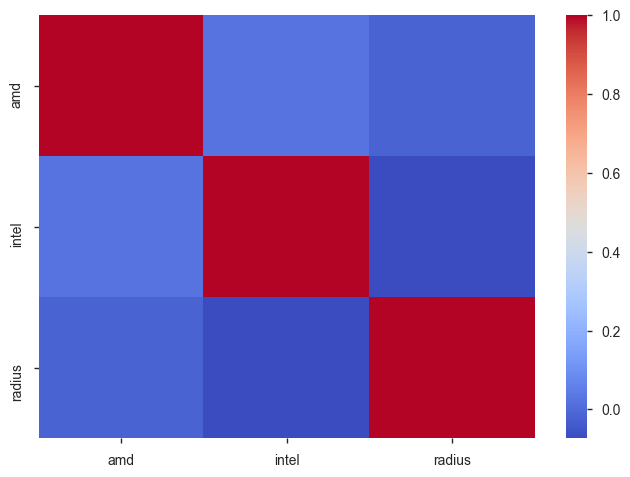

In [29]:
sns.heatmap(data_train.corr(), cmap='coolwarm')

## Train model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, SGDRegressor
from sklearn import cross_validation
import xgboost as xgb

from sklearn.preprocessing import scale
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
X = data_train[['amd', 'intel']]
Y = data_train['radius']

In [32]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.33, random_state=101)

In [24]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
model=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
y_pred=model.predict(tesdmat)
print(y_pred)

[0.41329813 0.40923893 0.37050262 ... 0.38819432 0.41681844 0.4365949 ]


In [33]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

## Model Evaluation

In [110]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

AttributeError: 'GradientBoostingRegressor' object has no attribute 'coef_'

In [34]:
predictions = model.predict(X_test)

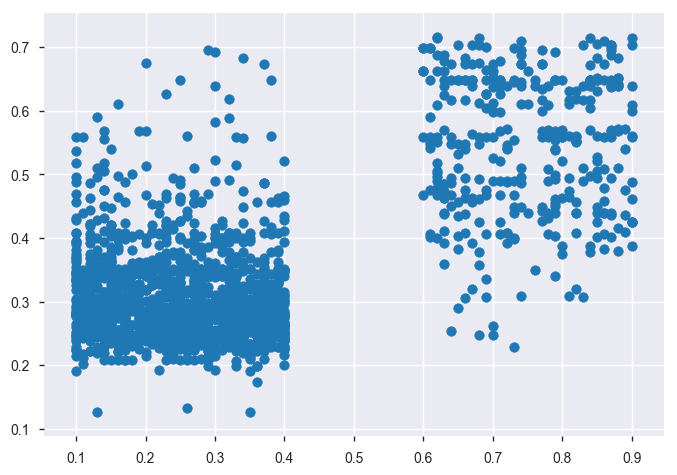

In [35]:
plt.scatter(y_test,predictions)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


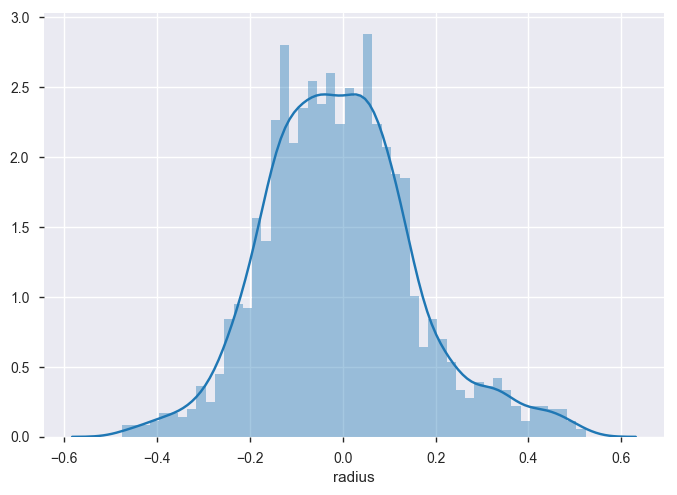

In [36]:
sns.distplot((y_test-predictions),bins=50);

In [37]:
X_test = data_test[['amd', 'intel']]
y_test = data['radius']

In [38]:
pred = model.predict(X_test)
print(pred)

[0.23826685 0.41859918 0.28243216 0.54614711 0.28031523 0.26064986
 0.27799405 0.2713453  0.35039351 0.36279758 0.2994002  0.26881911
 0.28156464 0.27799405 0.23637811 0.27799405 0.26144531 0.23826685
 0.6744776  0.38656502 0.23021888 0.27924464 0.244288   0.24832554
 0.22017946 0.33289911 0.32178082 0.37794527 0.41453297 0.46330928
 0.60983015 0.56850975 0.42590569 0.37879083 0.47441365 0.25754955
 0.35039351 0.55817434 0.24561686 0.41588774 0.35039351 0.62835761
 0.56052775 0.28189175 0.68324146 0.69580099 0.24561686 0.30159447
 0.22291072 0.24244777 0.30827549 0.25706364 0.70412844 0.32644456
 0.27734753 0.38180551 0.27343234 0.49227505 0.21984715 0.36256676
 0.34103498 0.24561686 0.40476193 0.23070398 0.57565919 0.40119481
 0.24070148 0.56110211 0.21011778 0.24662034 0.29605151 0.34122361
 0.39428934 0.26097598 0.63155723 0.24662034 0.24561686 0.43506857
 0.5781154  0.27799405 0.34726895 0.35039351 0.27799405 0.64917176
 0.23514705 0.3329861  0.58273893 0.24832554 0.25211681 0.2792

In [39]:
# tesdmat=xgb.DMatrix(X_test)
# pred=model.predict(tesdmat)
# print(pred)

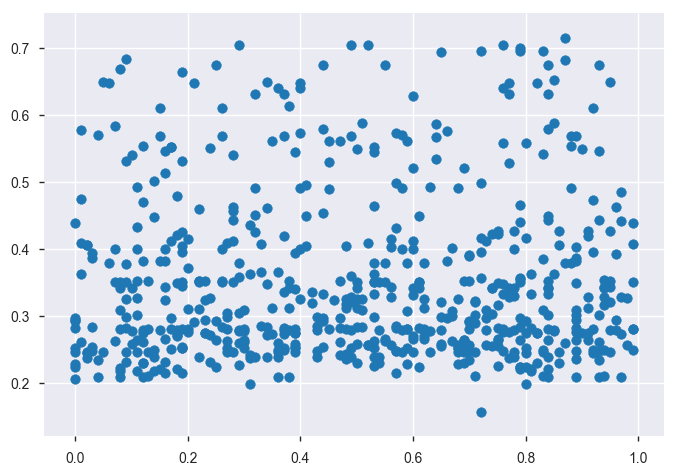

In [40]:
plt.scatter(y_test,pred)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


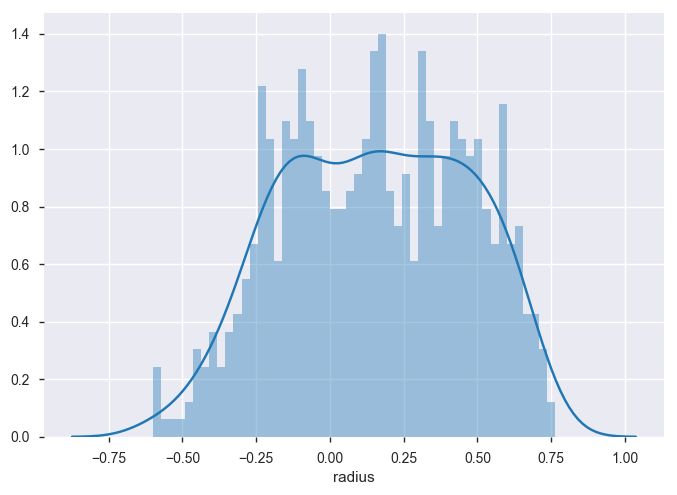

In [41]:
sns.distplot((y_test-pred),bins=50);

### Regression Evaluate Metrics

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.28921942707846143
MSE: 0.11987833297794435
RMSE: 0.34623450575866116


In [44]:
# pred = np.round(pred, decimals=3)
pred

array([0.23826685, 0.41859918, 0.28243216, 0.54614711, 0.28031523,
       0.26064986, 0.27799405, 0.2713453 , 0.35039351, 0.36279758,
       0.2994002 , 0.26881911, 0.28156464, 0.27799405, 0.23637811,
       0.27799405, 0.26144531, 0.23826685, 0.6744776 , 0.38656502,
       0.23021888, 0.27924464, 0.244288  , 0.24832554, 0.22017946,
       0.33289911, 0.32178082, 0.37794527, 0.41453297, 0.46330928,
       0.60983015, 0.56850975, 0.42590569, 0.37879083, 0.47441365,
       0.25754955, 0.35039351, 0.55817434, 0.24561686, 0.41588774,
       0.35039351, 0.62835761, 0.56052775, 0.28189175, 0.68324146,
       0.69580099, 0.24561686, 0.30159447, 0.22291072, 0.24244777,
       0.30827549, 0.25706364, 0.70412844, 0.32644456, 0.27734753,
       0.38180551, 0.27343234, 0.49227505, 0.21984715, 0.36256676,
       0.34103498, 0.24561686, 0.40476193, 0.23070398, 0.57565919,
       0.40119481, 0.24070148, 0.56110211, 0.21011778, 0.24662034,
       0.29605151, 0.34122361, 0.39428934, 0.26097598, 0.63155

In [45]:
output = pd.DataFrame({'radius' : pred})

In [46]:
output.to_csv('submissions.csv', index = False)

In [47]:
output.shape

(603, 1)

In [48]:
data.shape

(603, 2)